<a href="https://colab.research.google.com/github/sravani12-ui/Task-3-web/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
How to do this task Task 5: Decision Trees and Random Forests

Objective: Learn tree-based models for classification & regression.

Tools: Scikit-learn, Graphviz

Hints/Mini Guide:

1. Train a Decision Tree Classifier and visualize the tree.

2. Analyze overfitting and control tree depth.

3. Train a Random Forest and compare accuracy.

4. Interpret feature importances.

5. Evaluate using cross-validation.

Dataset: You can use any dataset relevant to the task, e.g., Heart Disease Dataset

link to download click here to download dataset

Here is all the data you need:
"heart.csv"

## Data loading

### Subtask:
Load the "heart.csv" dataset.


**Reasoning**:
Load the "heart.csv" dataset into a pandas DataFrame and display the first few rows.



In [21]:
import pandas as pd
try:
    df = pd.read_csv('heart.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
    df = None # Assign None to df to indicate failure

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data exploration

### Subtask:
Explore the loaded heart disease dataset.


**Reasoning**:
Explore the dataset by checking its shape, data types, descriptive statistics, missing values, and the distribution of the target variable.  Also, visualize the distributions of numerical and categorical features and calculate the correlation between numerical features.



Shape of the DataFrame: (1025, 14)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Descriptive Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   

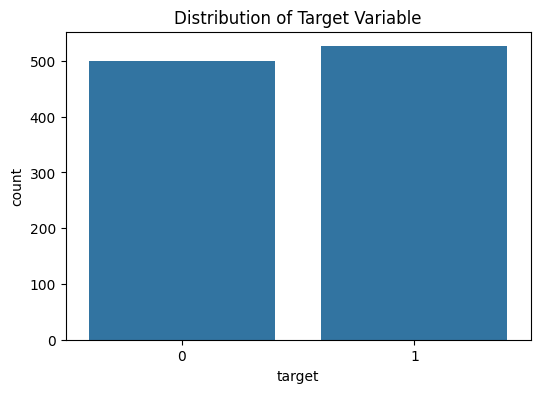

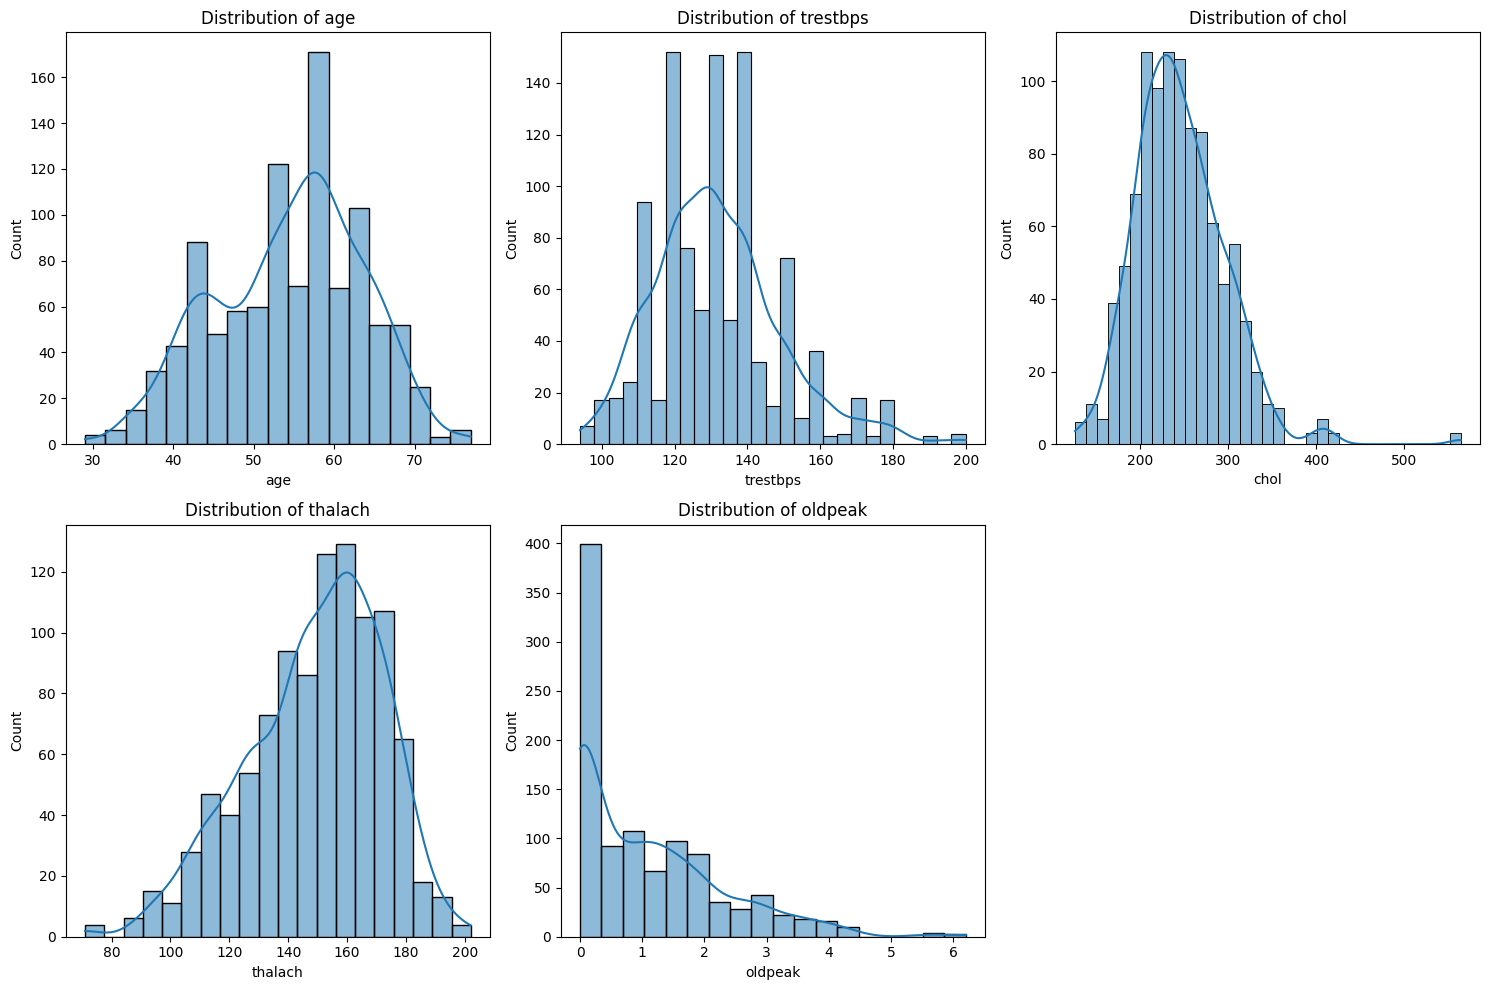

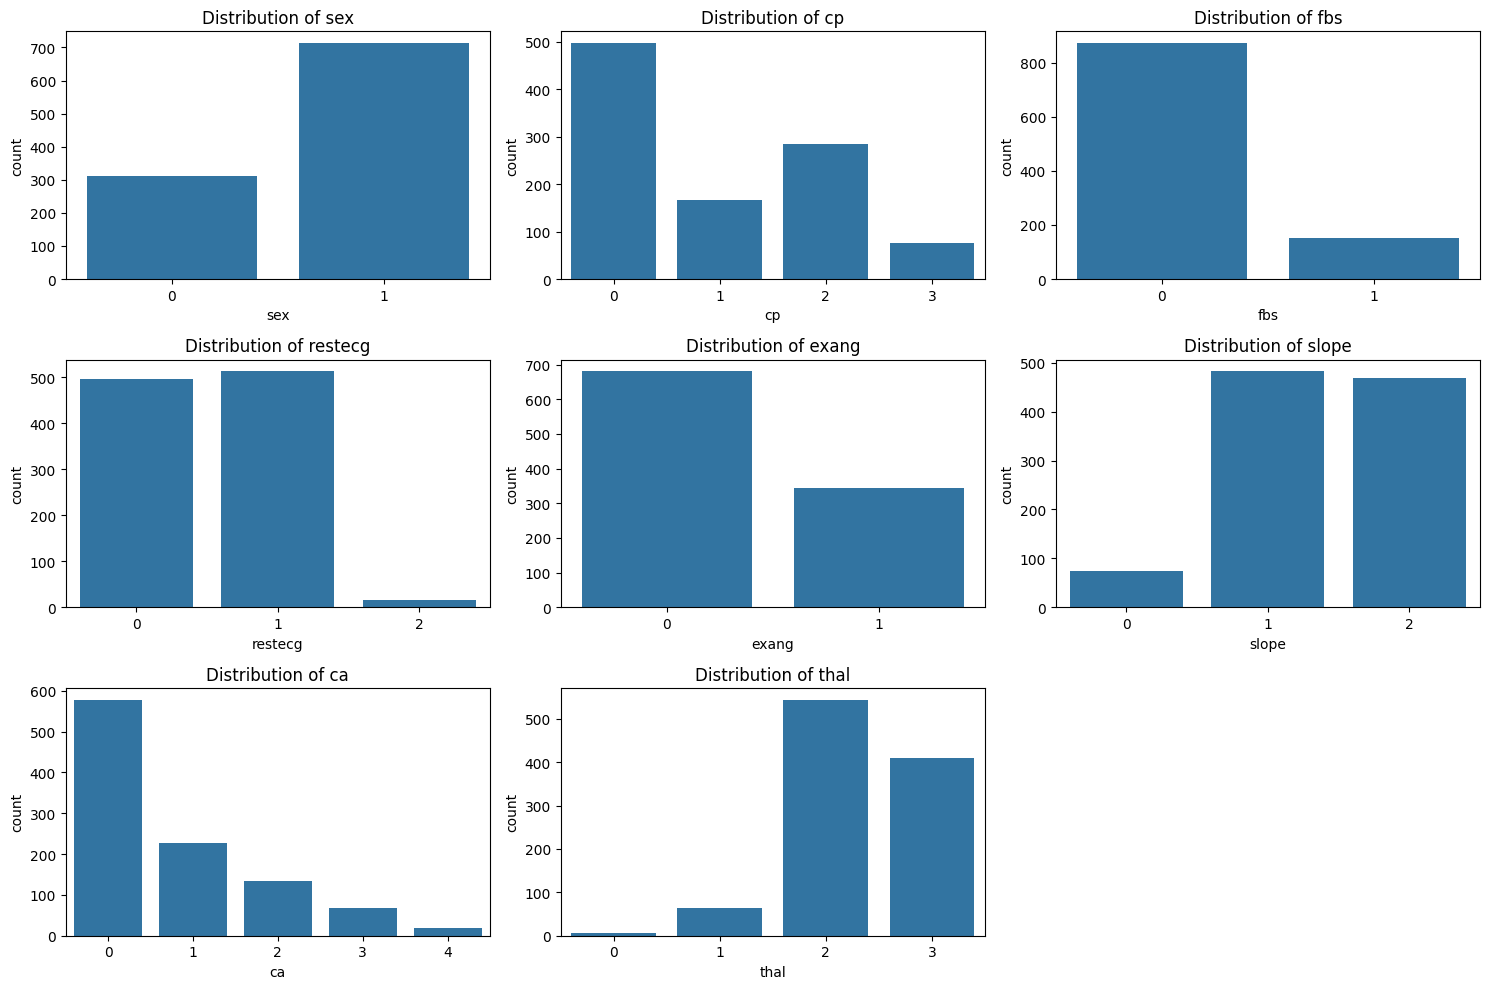

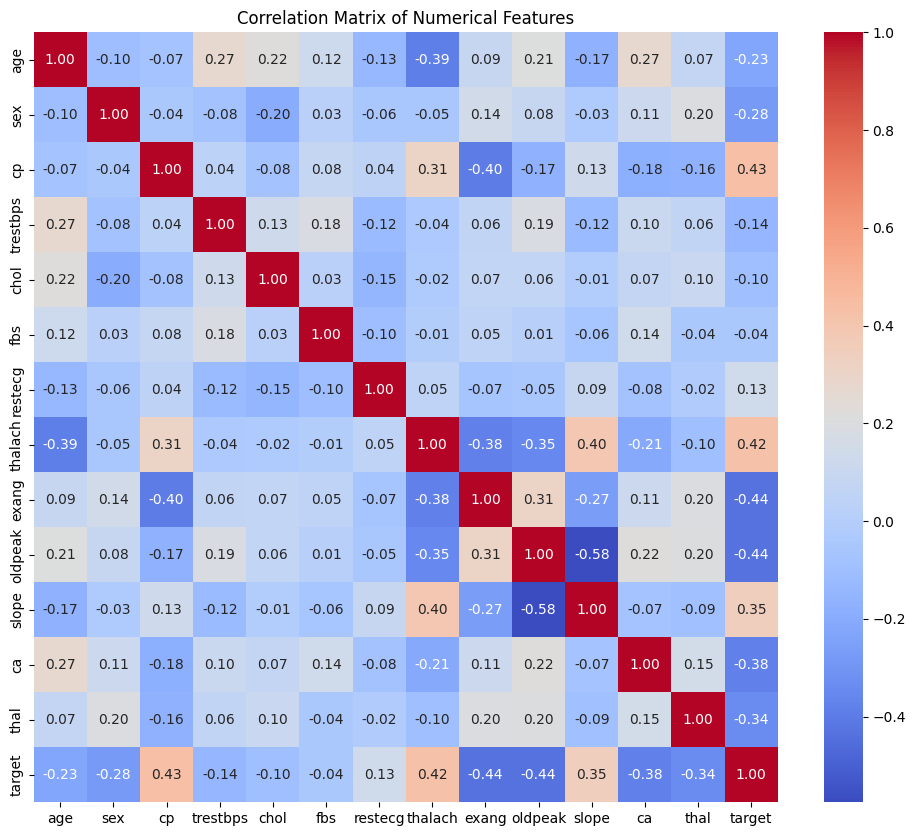

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:\n", df['target'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize distributions of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize distributions of categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Convert categorical features to numerical representations using one-hot encoding or label encoding, then split the data into training and testing sets.



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features and target variable
processed_df = pd.concat([df[numerical_features], encoded_df, df['target']], axis=1)

# Split data into training and testing sets
X = processed_df.drop('target', axis=1)
y = processed_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

display(X_train.head())
display(X_test.head())


,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
4,0.811626,0.314729,0.895791,-1.921155,0.696525,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
688,0.152247,3.767643,0.779115,-0.725362,2.475810,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
477,0.262144,-0.242193,-0.368191,0.027545,-0.574393,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
336,0.262144,0.983035,-2.371116,1.046184,-0.743849,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
960,-0.287339,0.203344,-1.009905,0.869030,-0.828577,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
756,1.031419,-0.687730,-0.037611,-2.364041,0.950709,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
353,0.262144,-1.244652,-0.912675,-1.035382,0.357614,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
929,0.591833,-0.130809,-0.815446,-0.769650,1.120164,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
129,0.262144,0.426113,-1.087688,-0.061032,-0.574393,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
591,0.921523,-1.356036,0.409644,0.869030,0.611797,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model training

### Subtask:
Train a Decision Tree Classifier and visualize the tree.


**Reasoning**:
Train a DecisionTreeClassifier, visualize it using export_graphviz, and convert the .dot file to a png image.



In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import os

# Initialize the DecisionTreeClassifier with max_depth=5
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree using export_graphviz
feature_names = X_train.columns.tolist()  # Get feature names from X_train
export_graphviz(clf, out_file="decision_tree.dot", feature_names=feature_names, class_names=['0', '1'], filled=True, rounded=True)

# Convert the .dot file to .png (using system command)
try:
    os.system('dot -Tpng decision_tree.dot -o decision_tree.png')
    print("Successfully converted decision_tree.dot to decision_tree.png")
except Exception as e:
    print(f"Error during .dot to .png conversion: {e}")

Successfully converted decision_tree.dot to decision_tree.png


## Model evaluation

### Subtask:
Evaluate the Decision Tree Classifier.


**Reasoning**:
Evaluate the trained DecisionTreeClassifier using the test data and print the evaluation metrics and tree depth.



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target variable for the test dataset
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Analyze the trained decision tree for potential overfitting
print(f"Decision Tree Depth: {clf.tree_.max_depth}")

Accuracy: 0.8878048780487805
Precision: 0.8796296296296297
Recall: 0.9047619047619048
F1-score: 0.892018779342723
Decision Tree Depth: 5


## Model optimization

### Subtask:
Optimize the Decision Tree Classifier by tuning the `max_depth` hyperparameter.


**Reasoning**:
Perform a hyperparameter search for `max_depth` using cross-validation and retrain the model with the optimal `max_depth`.



In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for max_depth
param_grid = {'max_depth': range(1, 21)}

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best max_depth
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

# Retrain the classifier with the optimal max_depth
clf_optimized = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
clf_optimized.fit(X_train, y_train)

Best max_depth: 12


DecisionTreeClassifier(max_depth=12, random_state=42)

## Model training

### Subtask:
Train a Random Forest Classifier


**Reasoning**:
Train a RandomForestClassifier with the best max_depth found in the previous step (which was 12).



In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the best max_depth and n_estimators
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, random_state=42)

## Model evaluation

### Subtask:
Evaluate the Random Forest Classifier and compare its performance to the optimized Decision Tree Classifier. Analyze feature importances.


**Reasoning**:
Evaluate the Random Forest Classifier, compare its performance with the optimized Decision Tree Classifier, and analyze feature importances.



Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Decision Tree Metrics:
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.9714285714285714
F1-score: 0.9855072463768116


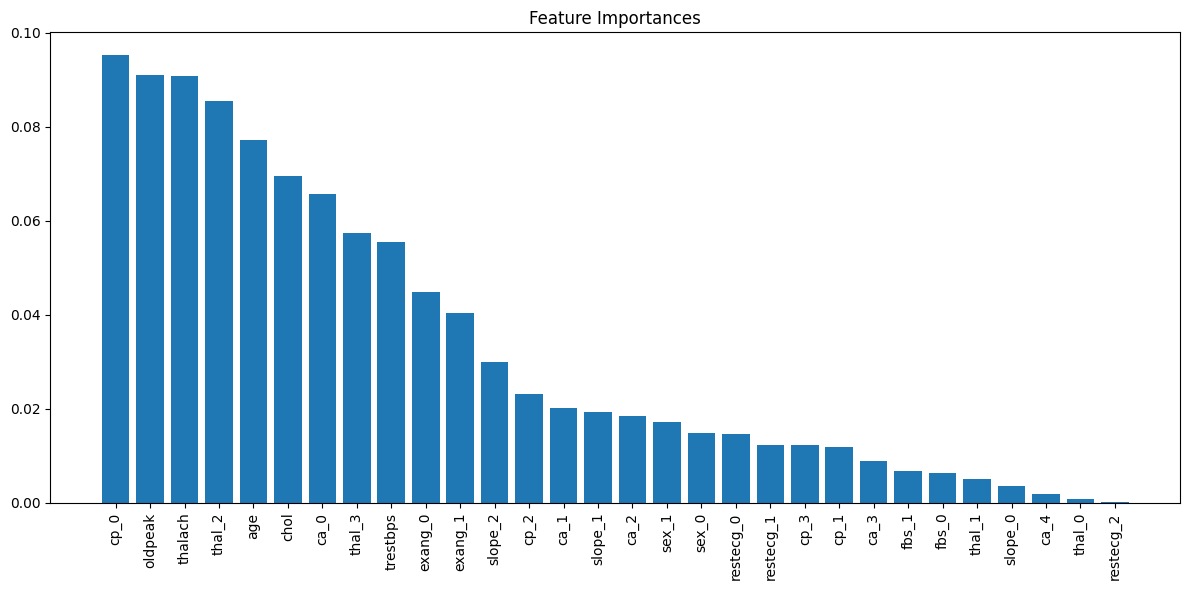


Feature Importances:
cp_0: (0.09529129821180521)
oldpeak: (0.0909032722021958)
thalach: (0.09082597186706909)
thal_2: (0.08542945656928737)
age: (0.07723889612563627)
chol: (0.06945801301264967)
ca_0: (0.06566107192264553)
thal_3: (0.05732072924309835)
trestbps: (0.055388045459390176)
exang_0: (0.04485630102092603)
exang_1: (0.04027768558517831)
slope_2: (0.02989714007813236)
cp_2: (0.023030599546703178)
ca_1: (0.020131834559112365)
slope_1: (0.019333210096632563)
ca_2: (0.01841302897081172)
sex_1: (0.01719918982323065)
sex_0: (0.01474506462293506)
restecg_0: (0.01455073434040957)
restecg_1: (0.012388211661210513)
cp_3: (0.01224199176054671)
cp_1: (0.01195060216938706)
ca_3: (0.008858592581519598)
fbs_1: (0.006799153779211211)
fbs_0: (0.006229081046065066)
thal_1: (0.005051646743387654)
slope_0: (0.0036091210874531865)
ca_4: (0.0019067430683818274)
thal_0: (0.0007627019712546087)
restecg_2: (0.0002506108737333804)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Predict using the Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Random Forest metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

# Predict using the optimized Decision Tree Classifier (assuming clf_optimized is available from a previous step)
y_pred_dt = clf_optimized.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Decision Tree metrics
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")


# Feature importances from Random Forest
feature_importances = rf_clf.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
indices = np.argsort(feature_importances)[::-1] #Sort feature importances in descending order
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

print("\nFeature Importances:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns.values[indices[f]]}: ({feature_importances[indices[f]]})")

## Model evaluation

### Subtask:
Perform k-fold cross-validation on both the optimized Decision Tree and the Random Forest models.


**Reasoning**:
Perform k-fold cross-validation on the optimized Decision Tree and the Random Forest models and print the results.



In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation on the optimized decision tree model
dt_cv_scores = cross_val_score(clf_optimized, X_train, y_train, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on the random forest model
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean Accuracy:", np.mean(dt_cv_scores))
print("Standard Deviation:", np.std(dt_cv_scores))

print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Accuracy:", np.mean(rf_cv_scores))
print("Standard Deviation:", np.std(rf_cv_scores))

Decision Tree Cross-Validation Scores: [0.98170732 0.98780488 0.99390244 0.9695122  1.        ]
Mean Accuracy: 0.9865853658536585
Standard Deviation: 0.010490640569564188

Random Forest Cross-Validation Scores: [0.96341463 0.99390244 0.99390244 0.98170732 1.        ]
Mean Accuracy: 0.9865853658536585
Standard Deviation: 0.013020827136623562


## Summary:

### Q&A
No questions were posed in the provided task description.

### Data Analysis Key Findings
* The heart disease dataset contains 1025 samples and 14 features, with no missing values. The target variable is relatively balanced.
* One-hot encoding was applied to categorical features, and numerical features were scaled using StandardScaler.  The data was split into 80/20 training and testing sets.
* A Decision Tree Classifier with a maximum depth of 5 achieved an accuracy of 0.888, precision of 0.880, recall of 0.905, and an F1-score of 0.892 on the test set.
* Hyperparameter tuning using GridSearchCV identified an optimal `max_depth` of 12 for the Decision Tree.
* A Random Forest Classifier, trained with `n_estimators=100` and `max_depth=12`, achieved perfect scores (accuracy, precision, recall, F1-score all equal to 1.0) on the test set. This may indicate overfitting.
* Feature importance analysis from the Random Forest revealed `cp_0`, `oldpeak`, `thalach`, and `thal_2` as the most influential features.
* 5-fold cross-validation showed that both the optimized Decision Tree and the Random Forest models achieved high mean accuracy on the training data (0.9866), but the Random Forest had slightly higher standard deviation (0.0130 vs 0.0105 for the Decision Tree), suggesting more variability in performance across folds.

### Insights or Next Steps
* Investigate the Random Forest's perfect test set performance to rule out overfitting. Techniques like reducing `max_depth` or increasing `min_samples_leaf` could be explored.
* Evaluate both models on a held-out dataset or use more robust evaluation metrics to get a better understanding of their generalization capabilities.
